<a href="https://colab.research.google.com/github/Naomiweinberger/Hate-Speech/blob/main/Spacy_twitter_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Notebook #4-Data Preprocessing using SpaCy and Modeling**

**WARNING-DUE TO THE NATURE OF THIS PROJECT,THIS NOTEBOOK CONTAINS WORDS THAT ARE HATEFUL. THIS IS NO WAY REFLECTS THE VIEWS OF THE AUTHOR**

In this notebook, I used the spaCy library to preprocess the data. Unlike [notebook #2], here I didn't have to clean the data before imputing it into the model. This is because spaCy takes into account all of the nuances that cleaning the data gets rid of like capitalization,punucation, emojis and the like. SpaCy takes into account context, not just words. 

**Import libraries** I imported the libraries necessary for the project, including spaCy and sklearn and imblearn. 

In [38]:
!python -m spacy download en_core_web_lg

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


2021-10-25 21:47:53.568346: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2021-10-25 21:47:53.570725: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import spacy
from tqdm import tqdm
tqdm.pandas()
!python3 -m spacy download en_core_web_lg

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix,precision_score, recall_score, accuracy_score, f1_score,roc_curve, auc


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.pipeline import Pipeline as IMBPipeline

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

C:\Users\weinb\anaconda3\envs\learn-env\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


**Model Function** I created a function to streamline the modeling process.

In [8]:
def run_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)    
    cnf_matrix_test = confusion_matrix(y_test,  y_pred_test)
    cnf_matrix_train = confusion_matrix(y_train,  y_pred_train)
    print('Confusion Matrix for Train Set:\n', cnf_matrix_train) 
    print('Confusion Matrix for Test Set:\n', cnf_matrix_test)
 
    cnf_matrix_train = confusion_matrix(y_train,  y_pred_train)
  
    print('Classification Report for Train Set:\n',classification_report(y_train, y_pred_train))
    print('Classification Report for Test Set:\n',classification_report(y_test , y_pred_test))
 
    
    plot_confusion_matrix(model, X_test, y_test,
                     cmap=plt.cm.Blues)
    plot_confusion_matrix(model, X_train, y_train,
                     cmap=plt.cm.Blues)
    
   
    return model

**Data**- I used SpaCy to preprocess the data

In [9]:
hatespeech_df = pd.read_csv('C:\\Users\\weinb\\Hate-speech\\Data\\labeleddata.csv')
hatespeech_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [10]:
hatespeech_df_2 = pd.read_csv('C:\\Users\\weinb\\Hate-speech\\Data\\train_E6oV3lV.csv')
hatespeech_df_2.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [11]:
hatespeech_df_1=hatespeech_df[['class','tweet']]

In [12]:
hatespeech_df_2['class']=hatespeech_df_2['label']

In [13]:
df_2 = pd.DataFrame(hatespeech_df_2, columns= ['class','tweet'])
df_2['class'] = df_2['class'].replace([1,0],[0,2])

In [14]:
hatespeech=pd.concat([hatespeech_df_1, df_2])

In [15]:
hatespeech_df.shape

(24783, 7)

In [16]:
nlp = spacy.load('en_core_web_lg')
hatespeech['spacy'] = hatespeech.tweet.progress_apply(lambda x: nlp(x))

100%|██████████| 56745/56745 [07:45<00:00, 121.83it/s]


In [17]:
df= pd.DataFrame(np.vstack([x.vector for x in hatespeech.spacy]))

In [18]:
X=df
y=hatespeech['class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

In [20]:
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X, y)

**Baseline models**


Confusion Matrix for Train Set:
 [[ 1126   915   897]
 [   77 14869   406]
 [  168  1652 25286]]
Confusion Matrix for Test Set:
 [[ 188  247  299]
 [  27 3672  139]
 [  62  588 6127]]
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.82      0.38      0.52      2938
           1       0.85      0.97      0.91     15352
           2       0.95      0.93      0.94     27106

    accuracy                           0.91     45396
   macro avg       0.88      0.76      0.79     45396
weighted avg       0.91      0.91      0.90     45396

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.68      0.26      0.37       734
           1       0.81      0.96      0.88      3838
           2       0.93      0.90      0.92      6777

    accuracy                           0.88     11349
   macro avg       0.81      0.71      0.72     11349
weighted avg       0.88      0.88 

KNeighborsClassifier()

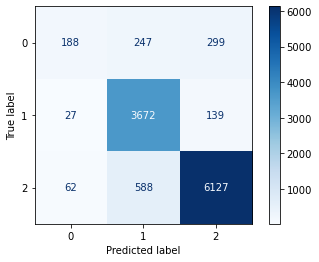

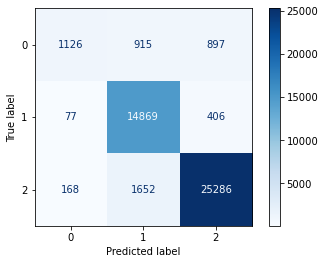

In [55]:
classifier_knn = KNeighborsClassifier()
run_model(classifier_knn, X_train, X_test, y_train, y_test) 

Confusion Matrix for Train Set:
 [[  995  1007   936]
 [  963 13810   579]
 [ 3283  4409 19414]]
Confusion Matrix for Test Set:
 [[ 252  242  240]
 [ 254 3429  155]
 [ 824 1154 4799]]
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.19      0.34      0.24      2938
           1       0.72      0.90      0.80     15352
           2       0.93      0.72      0.81     27106

    accuracy                           0.75     45396
   macro avg       0.61      0.65      0.62     45396
weighted avg       0.81      0.75      0.77     45396

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.19      0.34      0.24       734
           1       0.71      0.89      0.79      3838
           2       0.92      0.71      0.80      6777

    accuracy                           0.75     11349
   macro avg       0.61      0.65      0.61     11349
weighted avg       0.80      0.75 

GaussianNB()

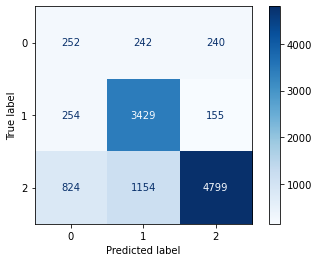

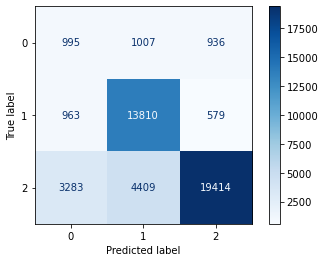

In [57]:
classifier_nb = GaussianNB()
run_model(classifier_nb, X_train, X_test, y_train, y_test) 


Confusion Matrix for Train Set:
 [[ 2935     3     0]
 [    8 15343     1]
 [    0     4 27102]]
Confusion Matrix for Test Set:
 [[ 213  210  311]
 [ 289 2956  593]
 [ 373  559 5845]]
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2938
           1       1.00      1.00      1.00     15352
           2       1.00      1.00      1.00     27106

    accuracy                           1.00     45396
   macro avg       1.00      1.00      1.00     45396
weighted avg       1.00      1.00      1.00     45396

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.24      0.29      0.26       734
           1       0.79      0.77      0.78      3838
           2       0.87      0.86      0.86      6777

    accuracy                           0.79     11349
   macro avg       0.63      0.64      0.64     11349
weighted avg       0.80      0.79 

DecisionTreeClassifier()

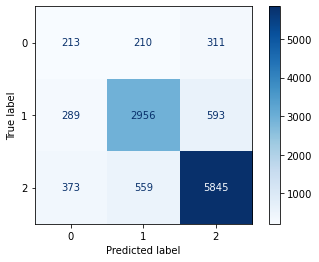

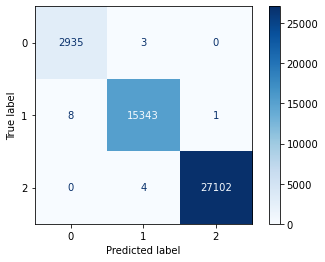

In [58]:
classifier_dt = DecisionTreeClassifier()
run_model(classifier_dt, X_train, X_test, y_train, y_test) 

Confusion Matrix for Train Set:
 [[ 2932     5     1]
 [    6 15344     2]
 [    0     3 27103]]
Confusion Matrix for Test Set:
 [[  86  221  427]
 [   7 3537  294]
 [   2  234 6541]]
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2938
           1       1.00      1.00      1.00     15352
           2       1.00      1.00      1.00     27106

    accuracy                           1.00     45396
   macro avg       1.00      1.00      1.00     45396
weighted avg       1.00      1.00      1.00     45396

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.91      0.12      0.21       734
           1       0.89      0.92      0.90      3838
           2       0.90      0.97      0.93      6777

    accuracy                           0.90     11349
   macro avg       0.90      0.67      0.68     11349
weighted avg       0.90      0.90 

RandomForestClassifier()

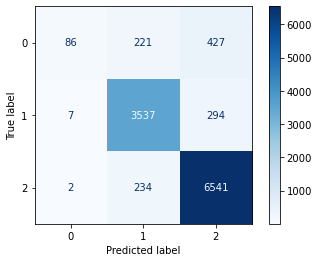

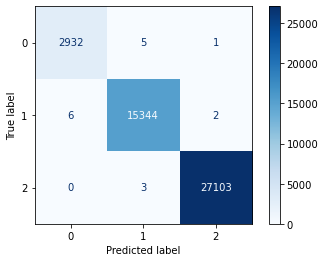

In [59]:
classifier_rt=RandomForestClassifier()
run_model(classifier_rt, X_train, X_test, y_train, y_test) 

[00:25:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix for Train Set:
 [[ 2912    20     6]
 [    7 15342     3]
 [    0    11 27095]]
Confusion Matrix for Test Set:
 [[ 257  200  277]
 [  38 3565  235]
 [  50  187 6540]]
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2938
           1       1.00      1.00      1.00     15352
           2       1.00      1.00      1.00     27106

    accuracy                           1.00     45396
   macro avg       1.00      1.00      1.00     45396
weighted avg       1.00      1.00      1.00     45396

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.74      0.35      0.48       73

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

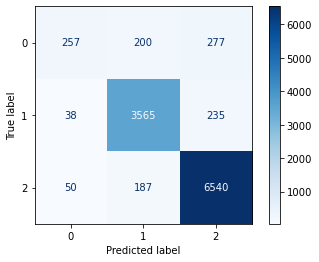

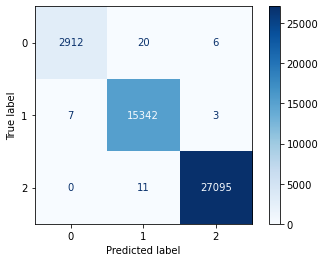

In [60]:
classifier_xg=xgb()
run_model(classifier_xg, X_train, X_test, y_train, y_test) 

**Base** **models with SMOTE** I ran the models with SMOTE after to see if it would improve the results.

Confusion Matrix for Train Set:
 [[33873     9     1]
 [ 1651 32171    61]
 [ 7084  2938 23861]]
Confusion Matrix for Test Set:
 [[ 733    1    0]
 [ 318 3511    9]
 [1408  594 4775]]
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.79      1.00      0.89     33883
           1       0.92      0.95      0.93     33883
           2       1.00      0.70      0.83     33883

    accuracy                           0.88    101649
   macro avg       0.90      0.88      0.88    101649
weighted avg       0.90      0.88      0.88    101649

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.30      1.00      0.46       734
           1       0.86      0.91      0.88      3838
           2       1.00      0.70      0.83      6777

    accuracy                           0.79     11349
   macro avg       0.72      0.87      0.72     11349
weighted avg       0.90      0.79 

KNeighborsClassifier()

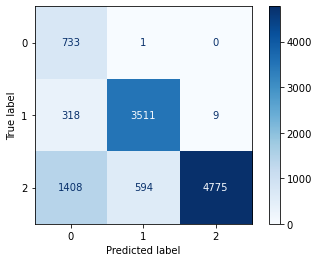

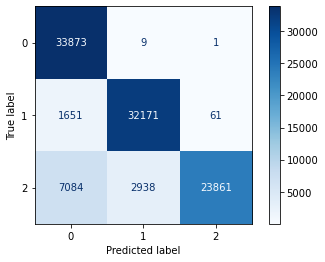

In [15]:
classifier_knn=KNeighborsClassifier()
run_model(classifier_knn, X_train_smote, X_test, y_train_smote, y_test) 

Confusion Matrix for Train Set:
 [[16076 11452  6355]
 [ 1904 31009   970]
 [ 5760  5000 23123]]
Confusion Matrix for Test Set:
 [[ 336  220  178]
 [ 251 3446  141]
 [1147 1028 4602]]
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.68      0.47      0.56     33883
           1       0.65      0.92      0.76     33883
           2       0.76      0.68      0.72     33883

    accuracy                           0.69    101649
   macro avg       0.70      0.69      0.68    101649
weighted avg       0.70      0.69      0.68    101649

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.19      0.46      0.27       734
           1       0.73      0.90      0.81      3838
           2       0.94      0.68      0.79      6777

    accuracy                           0.74     11349
   macro avg       0.62      0.68      0.62     11349
weighted avg       0.82      0.74 

GaussianNB()

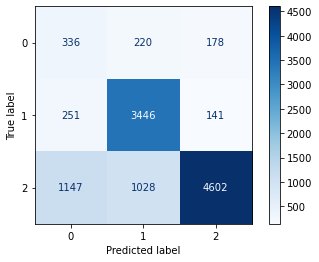

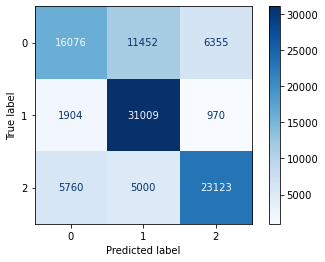

In [16]:
smote_nb = GaussianNB()
run_model(smote_nb, X_train_smote, X_test, y_train_smote, y_test)

Confusion Matrix for Train Set:
 [[33879     4     0]
 [   16 33866     1]
 [    0     5 33878]]
Confusion Matrix for Test Set:
 [[ 733    1    0]
 [   2 3836    0]
 [   0    1 6776]]
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33883
           1       1.00      1.00      1.00     33883
           2       1.00      1.00      1.00     33883

    accuracy                           1.00    101649
   macro avg       1.00      1.00      1.00    101649
weighted avg       1.00      1.00      1.00    101649

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       734
           1       1.00      1.00      1.00      3838
           2       1.00      1.00      1.00      6777

    accuracy                           1.00     11349
   macro avg       1.00      1.00      1.00     11349
weighted avg       1.00      1.00 

DecisionTreeClassifier()

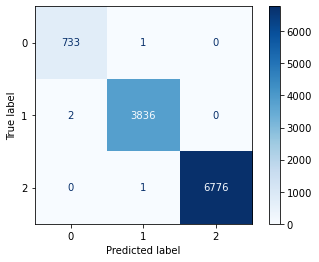

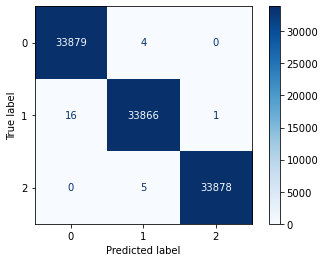

In [20]:
smote_dt = DecisionTreeClassifier()
run_model(smote_dt, X_train_smote, X_test, y_train_smote, y_test)

Confusion Matrix for Train Set:
 [[33879     4     0]
 [   16 33864     3]
 [    0     3 33880]]
Confusion Matrix for Test Set:
 [[ 733    1    0]
 [   2 3836    0]
 [   0    1 6776]]
Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33883
           1       1.00      1.00      1.00     33883
           2       1.00      1.00      1.00     33883

    accuracy                           1.00    101649
   macro avg       1.00      1.00      1.00    101649
weighted avg       1.00      1.00      1.00    101649

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       734
           1       1.00      1.00      1.00      3838
           2       1.00      1.00      1.00      6777

    accuracy                           1.00     11349
   macro avg       1.00      1.00      1.00     11349
weighted avg       1.00      1.00 

RandomForestClassifier()

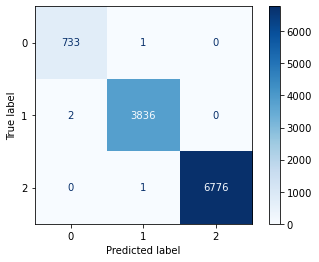

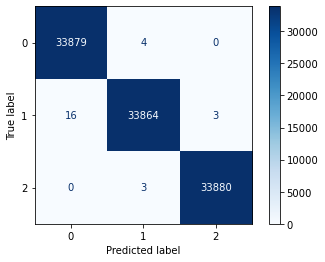

In [23]:
smote_rf = RandomForestClassifier()
run_model(smote_rf, X_train_smote, X_test, y_train_smote, y_test)

**Validation Set** I used key words from each of the three classes to scrape twitter and create a validation set. (see the [scraping twitter]notebook for more information.) I then used my best preforming model (the Random Forest model with SMOTE) on the validation set. The model had an accuracy of 80% on the validation set.

In [3]:
import pickle
# Save
with open('smote_rf.pickle', 'wb') as f:
    pickle.dump(smote_rf, f)

NameError: name 'smote_rf' is not defined

In [5]:
# Load
with open('C:\\Users\\weinb\\Hate-speech\\Pickled Models\\smote_rf.pickle', 'rb') as file:
    model = pickle.load(file)
    
  

In [21]:
feature_importance=model.feature_importances_
list(zip(feature_importance, X_train_smote.columns))

[(0.008524010392592181, 0),
 (0.004153377119813254, 1),
 (0.0018859905891085598, 2),
 (0.0030835807397816693, 3),
 (0.0016831410161425107, 4),
 (0.00143323264879711, 5),
 (0.0016198199088347017, 6),
 (0.001934078953393293, 7),
 (0.0030246062520451872, 8),
 (0.002115005258412865, 9),
 (0.00208739046006625, 10),
 (0.0022641494966252323, 11),
 (0.001408317921937833, 12),
 (0.012321577227285139, 13),
 (0.0014430502849232384, 14),
 (0.0014143570180175534, 15),
 (0.0024824695534917873, 16),
 (0.0028782951381803516, 17),
 (0.007384087312924552, 18),
 (0.001965069545293983, 19),
 (0.0020593620960695715, 20),
 (0.0025531800590347037, 21),
 (0.0035139753856383207, 22),
 (0.0016299451957968337, 23),
 (0.0016816982113741904, 24),
 (0.0026901243728545197, 25),
 (0.0020214966466151336, 26),
 (0.002017693683561181, 27),
 (0.0022837081905327256, 28),
 (0.005223003021047867, 29),
 (0.0017851086310123482, 30),
 (0.005231153708699221, 31),
 (0.0015016878362254932, 32),
 (0.001717908595179073, 33),
 (0.00

In [27]:
twitter_new=pd.read_csv('C:\\Users\\weinb\\Hate-speech\\Data\\twitter_3.csv')
twitter_new=twitter_new[['tweet','label']]


In [28]:
twitter_new['spacy'] = twitter_new.tweet.progress_apply(lambda x: nlp(x))

100%|██████████| 220/220 [00:10<00:00, 21.92it/s]


In [29]:
validation_df= pd.DataFrame(np.vstack([x.vector for x in twitter_new.spacy]))

In [30]:
validation_x=validation_df
validation_y=twitter_new['label']

In [31]:
predict_x=model.predict(validation_x)

Confusion Matrix for validation Set:
 [[ 5 16 15]
 [ 0 75  9]
 [ 1  3 96]]
Classification Report for validation Set:
               precision    recall  f1-score   support

           0       0.83      0.14      0.24        36
           1       0.80      0.89      0.84        84
           2       0.80      0.96      0.87       100

    accuracy                           0.80       220
   macro avg       0.81      0.66      0.65       220
weighted avg       0.80      0.80      0.76       220



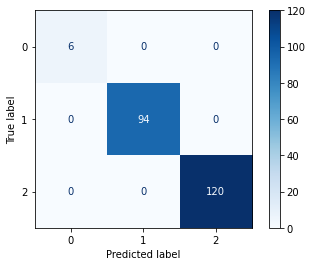

In [33]:
cnf_matrix_validation = confusion_matrix(validation_y,  predict_x)

print('Confusion Matrix for validation Set:\n', cnf_matrix_validation) 

print('Classification Report for validation Set:\n',classification_report(validation_y,  predict_x))
plot_confusion_matrix(model, validation_x, predict_x,
                     cmap=plt.cm.Blues)

**Conclusion** The Random Forest Model that was preprocessed using spaCy preformed very well on the validation set. 